**PROBLEM STATEMENT** <br>
Profit Estimation is a process of predicting a company's profit from it's expenditures.<br>
This project utilizes Multiple Linear Regression to predict the profit of 1000 companies based on attributes like R&D Spend, 
<br>Administration, and Marketing expenses and the State the company is located.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/bambino/Documents/DATASETS/Simplilearn-Machine Learning Full/Linear Regression/1000_Companies.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
X=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [7]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [8]:
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

<AxesSubplot:>

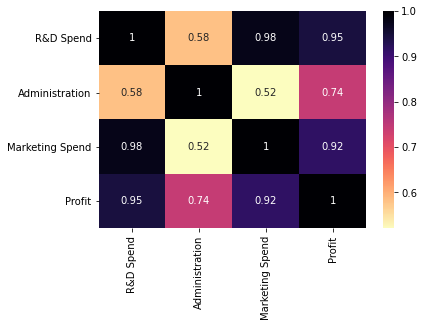

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='magma_r')

Correlation between attributes and Profit: R&D spend > Marketing Spend > Administration.

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
ct=ColumnTransformer([('State',OneHotEncoder(),[3])],remainder='passthrough')
X=ct.fit_transform(X)

In [15]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [16]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 9.9600000e+02,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9500000e+02,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 9.4700000e+02,
        1.0114555e+05, 4.0793454e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.0100000e+02,
        2.4192631e+05, 2.2714282e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.7500000e+02,
        3.2165214e+05, 2.8169232e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 9.9400000e+02,
        2.7093986e+05, 2.9544217e+05]])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [32]:
y_test.shape

(300,)

In [33]:
X_test.shape

(300, 6)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
pred=lr.predict(X_test)
pred

array([ 95549.7246715 ,  76419.51723358,  77005.81831462,  88192.62088661,
       163164.23895336,  50342.06527115, 117335.06849288,  97023.42695785,
        94029.38334519, 129798.82962821, 152551.29383621, 176263.42216787,
       183133.00444629, 146483.79275168, 173016.99050494,  79252.19485755,
       149755.93099939,  87130.64012673, 107347.97968587, 172582.18022548,
       153964.16246386, 146822.46419856, 113798.20290065,  54553.12391054,
        71777.44037405, 120786.80707218, 184599.38034603,  69374.88965415,
       142956.08424428, 161118.58623662,  93904.00348367, 108446.97178413,
       184412.44989952, 128263.23341786, 154214.951931  ,  96392.64226706,
       160142.36224293,  99258.61281054, 173230.75841873,  95431.33886832,
        92710.68673228, 155758.21589087,  56596.08417062,  74224.25755794,
       166979.11983983,  63828.19064949,  97220.65839416, 104596.2602243 ,
       143911.90572034,  59422.63766796, 136196.17456925,  58763.7077459 ,
       145730.45571503, 1

In [36]:
print('Intercept:',lr.intercept_)
print('Coefficient:',lr.coef_)

Intercept: -87199.05688719143
Coefficient: [-2.43620092e+02 -3.00652912e+02  5.44273004e+02  7.77461502e+01
  1.16485359e+00  1.09542031e-01]


In [37]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test,pred)

0.9634955269156089